In [1]:
import pandas as pd

In [25]:
df_train = pd.read_csv('X_train_Hi5.csv', nrows=100000)
df_test = pd.read_csv('X_test_Hi5.csv', nrows=100000)

Proportion of groundwater categories

<Axes: xlabel='piezo_groundwater_level_category'>

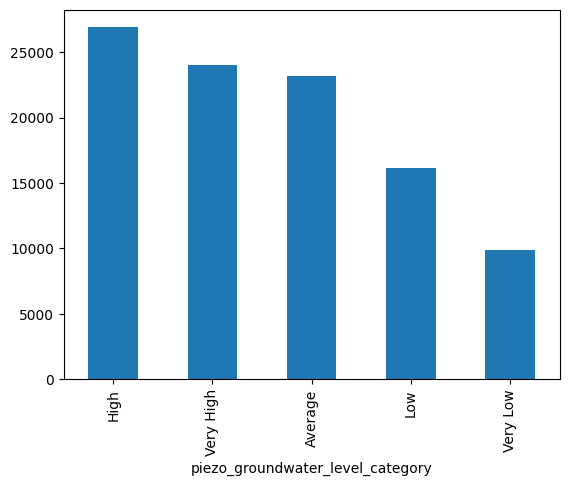

In [3]:
df_train['piezo_groundwater_level_category'].value_counts().plot(kind='bar')

Groundwater levels through time

0


<Axes: title={'center': 'Average Groundwater Level Category by Date'}, xlabel='piezo_measurement_date', ylabel='Groundwater Level (Numeric)'>

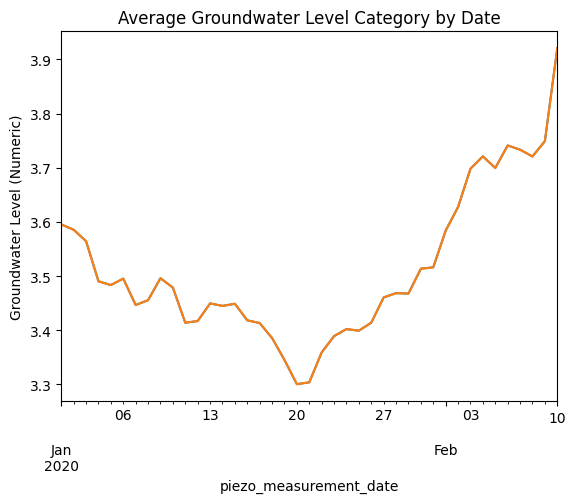

In [30]:
# Define a mapping of categories to numeric values
category_mapping = {
    'Very Low': 1,
    'Low': 2,
    'Medium': 3,
    'High': 4,
    'Very High': 5
}

# Apply the mapping to the 'piezo_groundwater_level_category' column
df_train['piezo_groundwater_level_category_numeric'] = df_train['piezo_groundwater_level_category'].map(category_mapping)

# Now group by 'piezo_measurement_date' and calculate the mean of the numeric category values
df_train.groupby('piezo_measurement_date')['piezo_groundwater_level_category_numeric'].mean().plot()

# Convert 'piezo_measurement_date' to datetime
df_train['piezo_measurement_date'] = pd.to_datetime(df_train['piezo_measurement_date'], errors='coerce')

# Check if the conversion was successful (e.g., no null values)
print(df_train['piezo_measurement_date'].isna().sum())

# Drop rows with invalid or missing 'piezo_measurement_date' entries
df_train = df_train.dropna(subset=['piezo_measurement_date'])

# Group by 'piezo_measurement_date' and calculate the mean of the numeric groundwater level category
df_train.groupby('piezo_measurement_date')['piezo_groundwater_level_category_numeric'].mean().plot(
    title="Average Groundwater Level Category by Date", ylabel="Groundwater Level (Numeric)"
)

Agriculture dependency

In [27]:
# Highlight areas where water use is likely concentrated on agriculture

# Ensure the column is numeric
df_train['insee_%_agri'] = pd.to_numeric(df_train['insee_%_agri'], errors='coerce').fillna(0)

# Average percentage of population working in agriculture
avg_agriculture = df_train['insee_%_agri'].mean()
print(f"Average percentage of population in agriculture: {avg_agriculture:.2f}%")

# Identify municipalities where agriculture dominates employment
high_agriculture_areas = df_train[df_train['insee_%_agri'] > 50]
print(f"Municipalities with > 50% population in agriculture: {len(high_agriculture_areas)}")

Average percentage of population in agriculture: 9.55%
Municipalities with > 50% population in agriculture: 3295


<Axes: title={'center': 'Average Agricultural Dependency by Groundwater Category'}, xlabel='piezo_groundwater_level_category', ylabel='% Agriculture'>

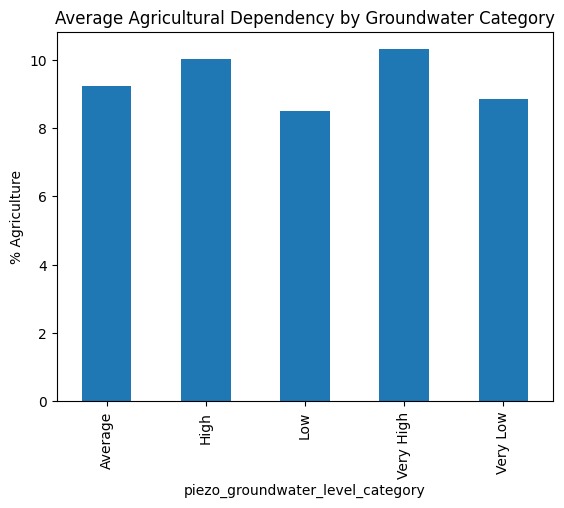

In [41]:
df_train.groupby('piezo_groundwater_level_category')['insee_%_agri'].mean().plot(
    kind='bar', title='Average Agricultural Dependency by Groundwater Category', ylabel='% Agriculture'
)

Median living standards vs Groundwater levels

<Axes: title={'center': 'Median Living Standards by Groundwater Level Category'}, xlabel='piezo_groundwater_level_category', ylabel='Euros'>

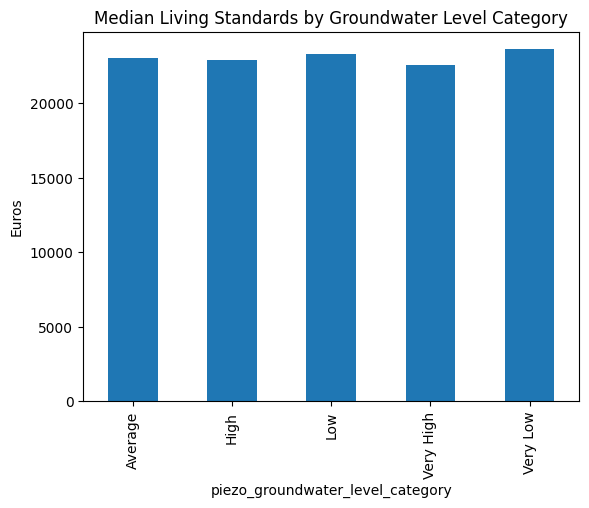

In [ ]:
# Correlation between median living standards and groundwater levels
df_train['insee_med_living_level'] = pd.to_numeric(df_train['insee_med_living_level'], errors='coerce')
df_train['insee_med_living_level'] = df_train['insee_med_living_level'].fillna(df_train['insee_med_living_level'].median())

df_train.groupby('piezo_groundwater_level_category')['insee_med_living_level'].mean().plot(
    kind='bar', title='Median Living Standards by Groundwater Level Category', ylabel='Euros'
)

Total population and water demand

In [13]:
# Total population in high water withdrawal areas
df_train['total_population'] = df_train['insee_pop_commune']
print(f"Total population on water demand: {df_train['total_population'].sum()}")

Total population on water demand: 701470938.0


In [ ]:
# Sum water withdrawals across facilities
df_train['total_withdrawals'] = df_train[['prelev_volume_0', 'prelev_volume_1', 'prelev_volume_2']].sum(axis=1)

# Top facilities by withdrawal volume
top_facilities = df_train[['prelev_structure_code_0', 'prelev_volume_0']].sort_values('prelev_volume_0', ascending=False).head(10)
print(top_facilities)

      prelev_structure_code_0  prelev_volume_0
77613           OPR0000049152     4.059566e+10
99944           OPR0000049152     4.059566e+10
99940           OPR0000049152     4.059566e+10
99938           OPR0000049152     4.059566e+10
99930           OPR0000049152     4.059566e+10
77621           OPR0000049152     4.059566e+10
82015           OPR0000049152     4.059566e+10
72136           OPR0000049152     4.059566e+10
72144           OPR0000049152     4.059566e+10
54797           OPR0000049152     4.059566e+10


Usage Distribution

<Axes: title={'center': 'Combined Water Usage Distribution'}, ylabel='count'>

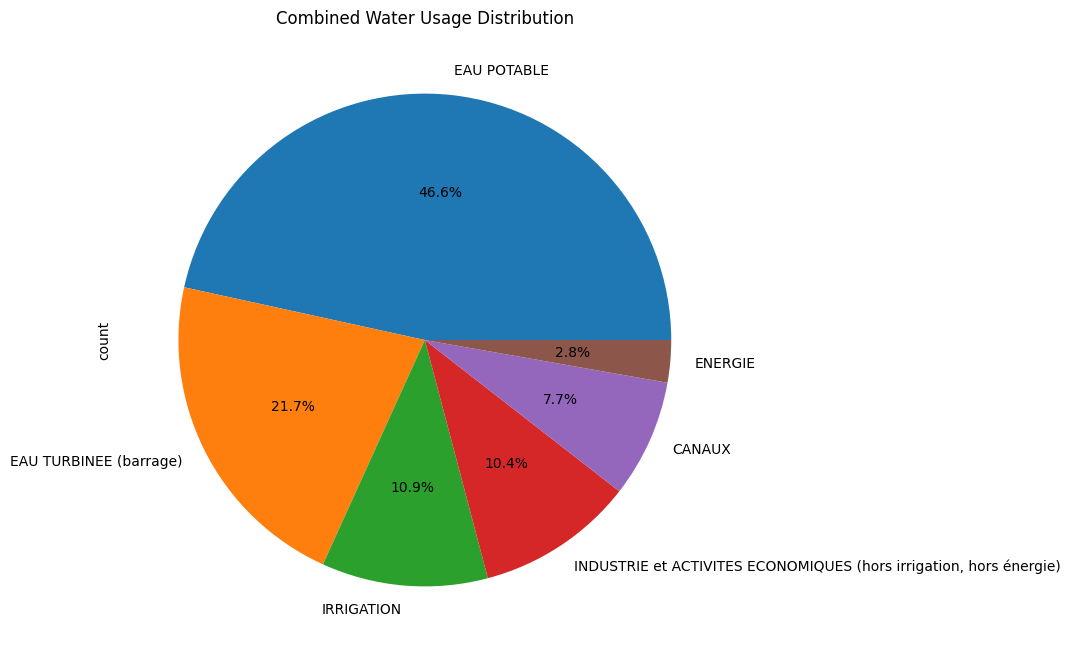

In [ ]:
# Combine the three usage labels into a single column
combined_usage_labels = pd.concat([df_train['prelev_usage_label_0'], 
                                   df_train['prelev_usage_label_1'], 
                                   df_train['prelev_usage_label_2']], axis=0)

# Calculate the distribution of the combined usage labels
usage_distribution = combined_usage_labels.value_counts()

usage_distribution.plot(kind='pie', title='Combined Water Usage Distribution', autopct='%1.1f%%', figsize=(8, 8))

Hydrometric Measurements

<Axes: title={'center': 'Hydrometric Measurements Over Time'}, xlabel='hydro_observation_date_elab', ylabel='Measurement (m³/s)'>

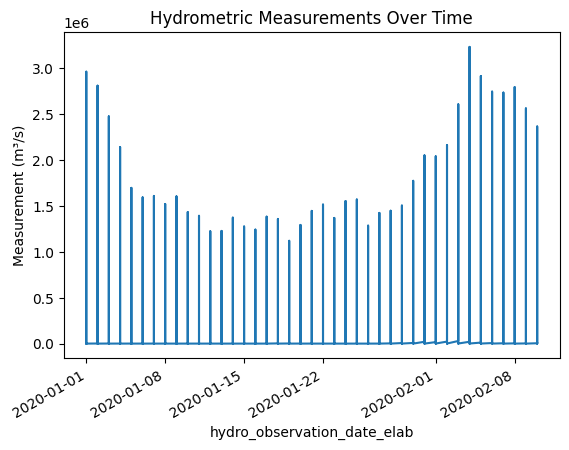

In [34]:
# Plot hydrometric measurements over time
df_train['hydro_observation_date_elab'] = pd.to_datetime(df_train['hydro_observation_date_elab'])
df_train.set_index('hydro_observation_date_elab')['hydro_observation_result_elab'].plot(
    title='Hydrometric Measurements Over Time', ylabel='Measurement (m³/s)'
)

Weather impacts (rainfall)

In [47]:
# Correlation between rainfall and groundwater levels

# Drop rows with NaN values in either of the columns
df_train = df_train.dropna(subset=['meteo_rain_height', 'piezo_groundwater_level_category_numeric'])

correlation = df_train[['meteo_rain_height', 'piezo_groundwater_level_category_numeric']].corr()
correlation

,meteo_rain_height,piezo_groundwater_level_category_numeric
meteo_rain_height,1.00000,0.01463
piezo_groundwater_level_category_numeric,0.01463,1.00000


<Axes: title={'center': 'Rainfall vs Groundwater Levels'}, xlabel='meteo_rain_height', ylabel='piezo_groundwater_level_category'>

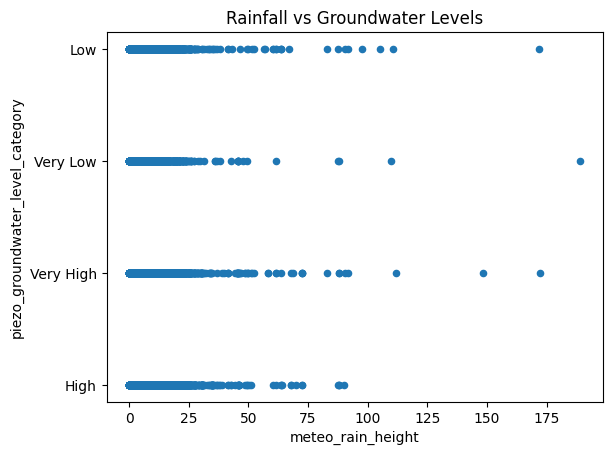

In [48]:
# Scatter plot for rainfall vs groundwater levels
df_train.plot.scatter(x='meteo_rain_height', y='piezo_groundwater_level_category', title='Rainfall vs Groundwater Levels')

<Axes: >

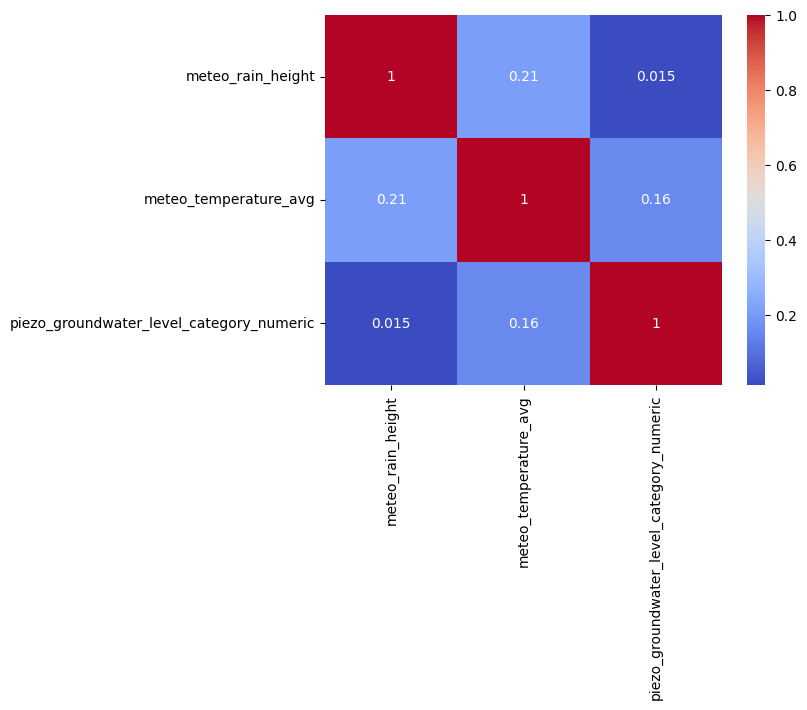

In [50]:
import seaborn as sns
sns.heatmap(df_train[['meteo_rain_height', 'meteo_temperature_avg', 'piezo_groundwater_level_category_numeric']].corr(), annot=True, cmap='coolwarm')

In [54]:
# Correlate depth with groundwater levels
depth_correlation = df_train[['piezo_station_investigation_depth', 'piezo_groundwater_level_category_numeric']].corr()
depth_correlation

,piezo_station_investigation_depth,piezo_groundwater_level_category_numeric
piezo_station_investigation_depth,1.000000,0.019005
piezo_groundwater_level_category_numeric,0.019005,1.000000


<Axes: title={'center': 'Depth vs Groundwater Levels'}, xlabel='piezo_station_investigation_depth', ylabel='piezo_groundwater_level_category_numeric'>

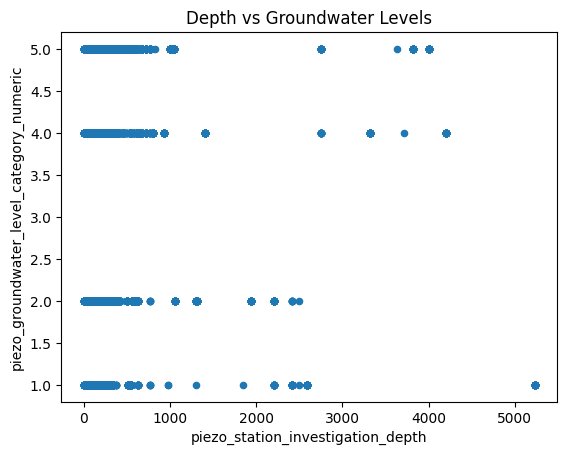

In [55]:
# Scatter plot for depth vs groundwater levels
df_train.plot.scatter(x='piezo_station_investigation_depth', y='piezo_groundwater_level_category_numeric', title='Depth vs Groundwater Levels')